In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None
%matplotlib inline

# Create Dataframe Merged

In [2]:
data_torino = pd.read_excel('preprocessed_data/torino.xlsx')
data_torino_survey = pd.read_excel('preprocessed_data/torino.xlsx', sheet_name=1)
data_torino_fvc = pd.read_excel('preprocessed_data/torino.xlsx', sheet_name=2)
data_lisbona = pd.read_excel('preprocessed_data/lisbona.xlsx')
data_lisbona_survey = pd.read_excel('preprocessed_data/lisbona.xlsx', sheet_name=1)
data_lisbona_fvc = pd.read_excel('preprocessed_data/lisbona.xlsx', sheet_name=2)

In [3]:
def convert_lisbona(dataframe):
    list_ref = []
    
    try:
        for ref in dataframe['REF']:
            if ref < 10:
                new_ref = 'LIS_000' + str(ref)
            elif ref < 100:
                new_ref = 'LIS_00' + str(ref)
            elif ref < 1000:
                new_ref = 'LIS_0' + str(ref)
            else:
                new_ref = 'LIS_' + str(ref)
            list_ref.append(new_ref)
        return list_ref
    
    except Exception as error:
        return dataframe['REF']
    
data_lisbona_survey['REF'] = convert_lisbona(data_lisbona_survey)
data_lisbona['REF'] = convert_lisbona(data_lisbona)
data_lisbona_fvc['REF'] = convert_lisbona(data_lisbona_fvc)

# Distribution Survey and FVC

In [4]:
survey_positive = data_torino_survey.groupby('REF')['SurveyFromDiagnosis'].apply(lambda x: x.abs().min())

(0.0, 2000.0)

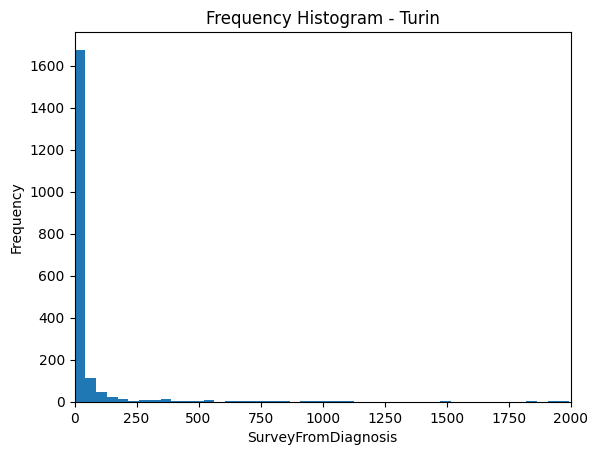

In [5]:
plt.hist(survey_positive.values, bins=150)
plt.gca().set(title='Frequency Histogram - Turin', xlabel='SurveyFromDiagnosis', ylabel='Frequency');
plt.xlim(0,2000)

In [6]:
surveys = data_lisbona_survey.groupby('REF')['SurveyFromDiagnosis'].apply(lambda x: x.abs().min())

(0.0, 2000.0)

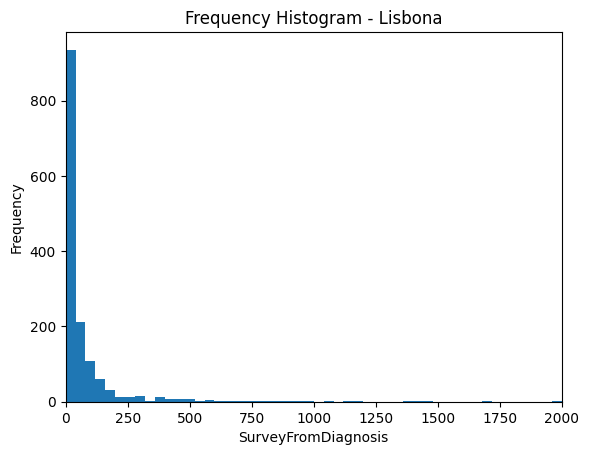

In [7]:
plt.hist(surveys.values, bins=150)
plt.gca().set(title='Frequency Histogram - Lisbona', xlabel='SurveyFromDiagnosis', ylabel='Frequency');
plt.xlim(0,2000)

(0.0, 2000.0)

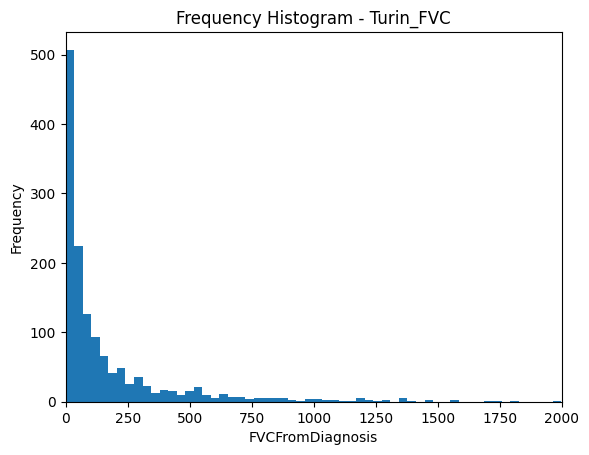

In [8]:
survey_positive_fvc = data_torino_fvc.groupby('REF')['FVCFromDiagnosis'].apply(lambda x: x.abs().min())
plt.hist(survey_positive_fvc.values, bins=150)
plt.gca().set(title='Frequency Histogram - Turin_FVC', xlabel='FVCFromDiagnosis', ylabel='Frequency');
plt.xlim(0,2000)

(0.0, 2000.0)

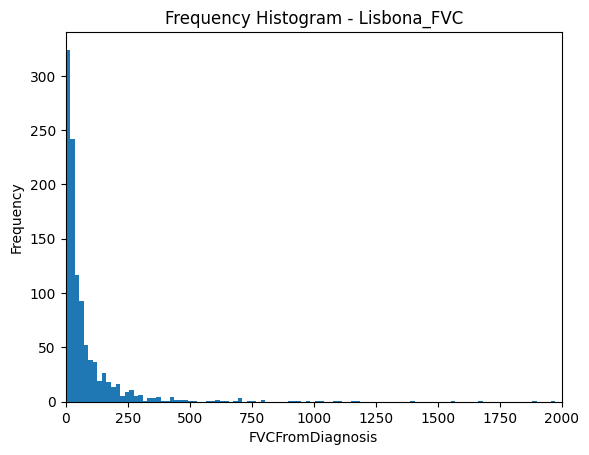

In [9]:
surveys_fvc = data_lisbona_fvc.groupby('REF')['FVCFromDiagnosis'].apply(lambda x: x.abs().min())
plt.hist(surveys_fvc.values, bins=150)
plt.gca().set(title='Frequency Histogram - Lisbona_FVC', xlabel='FVCFromDiagnosis', ylabel='Frequency');
plt.xlim(0,2000)

# Preparation Static

In [10]:
data_torino.set_index('REF', inplace=True)
data_lisbona.set_index('REF', inplace=True)

print('Dati di Torino: ', data_torino.shape)
print('Dati di Lisbona: ', data_lisbona.shape)

Dati di Torino:  (3111, 36)
Dati di Lisbona:  (1630, 36)


In [11]:
data_merged = pd.concat([data_torino, data_lisbona])
data_merged.head()

,Age_onset (years),Gender,Date Of Last visit or Death,Status,NIV,Date_NIV,PEG,Date_PEG,UMNvsLMN,Onset,...,SOD1 Mutation,C9orf72 repeat-primed PCR result,TARDBP mutation,FUS mutation,WaitingTime,WeightRelathion,NIVFromDiagnosis,TracheostomyFromDiagnosis,PEGFromDiagnosis,DateToDeathFromDiagnosis
REF,,,,,,,,,,,,,,,,,,,,,
TUR_0001,56.565400,2,2010-05-10,1.0,1.0,2008-04-15,0.0,2010-05-10,2.0,1.0,...,0.0,0.0,0.0,0.0,-275.0,-0.058824,1186.0,NaN,1941.0,1956.0
TUR_0002,57.247073,1,2004-05-18,1.0,1.0,2003-08-15,1.0,2004-05-11,3.0,2.0,...,0.0,0.0,0.0,0.0,-245.0,0.020408,212.0,NaN,482.0,504.0
TUR_0003,62.447639,1,2012-10-27,1.0,1.0,2012-05-15,1.0,2011-06-27,3.0,1.0,...,0.0,0.0,0.0,0.0,-122.0,-0.012658,670.0,NaN,347.0,850.0
TUR_0004,82.238859,1,2007-09-15,1.0,0.0,2007-09-15,0.0,2007-09-15,2.0,1.0,...,NaN,NaN,NaN,NaN,-366.0,NaN,1004.0,NaN,1004.0,1019.0
TUR_0005,53.962367,2,2004-02-03,1.0,0.0,2004-02-03,0.0,2004-02-03,3.0,1.0,...,NaN,NaN,NaN,NaN,-608.0,0.000000,506.0,NaN,506.0,521.0


In [12]:
data_merged.shape

(4741, 36)

In [13]:
data_merged.dropna(subset=['Status', 'Age_onset (years)', 'NIVFromDiagnosis', 'WaitingTime'], inplace=True)

In [14]:
data_merged[['NIV', 'PEG']] = data_merged[['NIV', 'PEG']].fillna(value=0)

In [15]:
data_merged.drop(columns=['TracheostomyFromDiagnosis', 'TARDBP mutation', 
                          'FUS mutation', 'SOD1 Mutation '], inplace=True)

In [16]:
data_merged = pd.get_dummies(data_merged, columns=['UMNvsLMN', 
                                                   'Onset', 'ULvsLL', 'DistProx', 
                                                   'Side', 'ALS familiar history', 
                                                   'smoke', 'Blood hypertension', 
                                                   'Diabetes – type I / II', 'Dyslipidemia', 
                                                   'Thyroid disorder', 'Autoimmune disorder', 
                                                   'Stroke', 'Cardiac disease', 'Primary cancer', 
                                                   'C9orf72 repeat-primed PCR result'])

In [17]:
data_merged.isnull().groupby(data_merged.index.str[:3]).mean().T

REF,LIS,TUR
Age_onset (years),0.000000,0.000000
Gender,0.000000,0.000000
Date Of Last visit or Death,0.000000,0.000000
Status,0.000000,0.000000
NIV,0.000000,0.000000
Date_NIV,0.000000,0.000000
PEG,0.000000,0.000000
Date_PEG,0.000000,0.000000
Height (m),0.211912,0.254581
Weight at 1st visit (kg),0.252038,0.246866


In [18]:
data_merged=data_merged[data_merged['DateToDeathFromDiagnosis'] >= 0]

# Merge Survey-FVC with Static

In [19]:
data_torino_survey.drop(columns=['ALSFRS_TOT', 'Date1'], inplace=True)
data_lisbona_survey.drop(columns=['Date1'], inplace=True)

In [20]:
data_torino_fvc.drop(columns=['CODICE', 'N_SPIRO', 'DATA SPIRO', 'DateOfDiagnosis'], inplace=True)
data_lisbona_fvc.drop(columns=['Date1', 'DateOfDiagnosis'], inplace=True)

data_lisbona_fvc.rename(columns={'%FVC1 ':'%FVC'}, inplace=True)

In [21]:
data_torino_fvc_min = data_torino_fvc.groupby('REF').apply(lambda x: x.loc[abs(x['FVCFromDiagnosis']).sort_values().index[0],])
data_lisbona_fvc_min = data_lisbona_fvc.groupby('REF').apply(lambda x: x.loc[abs(x['FVCFromDiagnosis']).sort_values().index[0],])

data_torino_fvc_min.set_index('REF', inplace=True)
data_lisbona_fvc_min.set_index('REF', inplace=True)

In [22]:
data_torino_survey_min = data_torino_survey.groupby('REF').apply(lambda x: x.loc[abs(x['SurveyFromDiagnosis']).sort_values().index[0],])
data_lisbona_survey_min = data_lisbona_survey.groupby('REF').apply(lambda x: x.loc[abs(x['SurveyFromDiagnosis']).sort_values().index[0],])

data_torino_survey_min.set_index('REF', inplace=True)
data_lisbona_survey_min.set_index('REF', inplace=True)

In [23]:
data_torino_survey.set_index('REF', inplace=True)
data_lisbona_survey.set_index('REF', inplace=True)

data_torino_fvc.set_index('REF', inplace=True)
data_lisbona_fvc.set_index('REF', inplace=True)

print('Dati di Torino sulle Survey: ', data_torino_survey.shape)
print('Dati di Lisbona sulle Survey: ', data_lisbona_survey.shape)

print('Dati di Torino sulle FVC: ', data_torino_fvc.shape)
print('Dati di Lisbona sulle FVC: ', data_lisbona_fvc.shape)

Dati di Torino sulle Survey:  (15006, 13)
Dati di Lisbona sulle Survey:  (7522, 13)
Dati di Torino sulle FVC:  (2890, 2)
Dati di Lisbona sulle FVC:  (2664, 2)


In [24]:
data_merged_fvc = pd.concat([data_torino_fvc_min, data_lisbona_fvc_min])

In [25]:
data_merged_survey = pd.concat([data_torino_survey_min, data_lisbona_survey_min])

In [26]:
data_merged = data_merged.join(data_merged_survey)
data_merged

,Age_onset (years),Gender,Date Of Last visit or Death,Status,NIV,Date_NIV,PEG,Date_PEG,Height (m),Weight at 1st visit (kg),...,ALSFRS_4,ALSFRS_5,ALSFRS_6,ALSFRS_7,ALSFRS_8,ALSFRS_9,ALSFRS_10,ALSFRS_11,ALSFRS_12,SurveyFromDiagnosis
REF,,,,,,,,,,,,,,,,,,,,,
TUR_0001,56.565400,2,2010-05-10,1.0,1.0,2008-04-15,0.0,2010-05-10,1.60,68.0,...,4,4,4,4,3.0,3.0,4,4.0,4.0,247.0
TUR_0002,57.247073,1,2004-05-18,1.0,1.0,2003-08-15,1.0,2004-05-11,1.73,98.0,...,4,4,4,4,4.0,3.0,4,4.0,4.0,0.0
TUR_0003,62.447639,1,2012-10-27,1.0,1.0,2012-05-15,1.0,2011-06-27,1.60,79.0,...,4,3,4,4,4.0,4.0,4,4.0,4.0,0.0
TUR_0004,82.238859,1,2007-09-15,1.0,0.0,2007-09-15,0.0,2007-09-15,NaN,NaN,...,4,3,3,3,3.0,2.0,4,4.0,4.0,-9.0
TUR_0005,53.962367,2,2004-02-03,1.0,0.0,2004-02-03,0.0,2004-02-03,1.58,60.0,...,3,4,4,4,4.0,4.0,4,4.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LIS_1725,39.460643,2,2022-04-08,2.0,0.0,2022-04-08,0.0,2022-04-08,1.62,58.3,...,1,2,2,3,3.0,3.0,4,4.0,4.0,1407.0
LIS_1726,68.873374,2,2022-04-07,2.0,0.0,2022-04-07,0.0,2022-04-07,1.56,54.0,...,3,3,2,3,2.0,1.0,2,3.0,4.0,127.0
LIS_1727,78.392882,2,2022-05-18,2.0,0.0,2022-05-18,0.0,2022-05-18,1.55,67.0,...,4,4,3,3,3.0,3.0,3,4.0,4.0,6.0


In [27]:
data_merged.dropna(subset=['SurveyFromDiagnosis'], inplace=True)

In [28]:
data_merged = data_merged[(data_merged['SurveyFromDiagnosis'] <= 30) & 
            (data_merged['SurveyFromDiagnosis'] >= -30)]

In [29]:
print('Shape of Merged with Survey without NaN:', data_merged.shape)

Shape of Merged with Survey without NaN: (2443, 70)


In [30]:
data_merged['SurveyFromDeath'] = (data_merged['DateToDeathFromDiagnosis'] - data_merged['SurveyFromDiagnosis'])

In [31]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2443 entries, TUR_0002 to LIS_1727
Data columns (total 71 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Age_onset (years)                     2443 non-null   float64       
 1   Gender                                2443 non-null   int64         
 2   Date Of Last visit or Death           2443 non-null   datetime64[ns]
 3   Status                                2443 non-null   float64       
 4   NIV                                   2443 non-null   float64       
 5   Date_NIV                              2443 non-null   datetime64[ns]
 6   PEG                                   2443 non-null   float64       
 7   Date_PEG                              2443 non-null   datetime64[ns]
 8   Height (m)                            2143 non-null   float64       
 9   Weight at 1st visit (kg)              2132 non-null   float64       

#### IMPORTANTE: Abbiamo scartato gli FVC poiché aggiungendoli e droppando quelli che hanno NaN e quelli che sono tra -30 giorni e 30 giorni dalla data della diagnosi sono alla fine 736 risultando troppi pochi pazienti.

In [32]:
data_merged['Status']=data_merged['Status'].apply(lambda x: False if x == 1.0 else True)
data_merged['Gender']=data_merged['Gender'].apply(lambda x: 0 if x == 1.0 else 1)

In [33]:
data_merged[['Status', 'SurveyFromDeath']].apply(tuple, axis=1)

REF
TUR_0002     (False, 504.0)
TUR_0003     (False, 850.0)
TUR_0004    (False, 1028.0)
TUR_0005     (False, 521.0)
TUR_0006    (False, 1499.0)
                 ...       
LIS_1711       (True, 34.0)
LIS_1713        (True, 0.0)
LIS_1714      (True, 111.0)
LIS_1720        (True, 0.0)
LIS_1727       (True, 41.0)
Length: 2443, dtype: object